# Projet DM : Analyse supervisee

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataFinale.csv to dataFinale.csv


In [ ]:
# Import des bibliothèques nécessaires
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import time

# Load the dataset
dataset = pd.read_csv("agriculture.csv")
dataset

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,0.264264,0.435115,0.552288,0.458716,0.560000,0.512821,0.371469,0.250000,0.009671,0.338308,0.449321,0.056818,0.512821,0.0
1,0.489489,0.351145,0.189542,0.605505,0.733333,0.820513,0.487698,0.338235,0.062863,0.721393,0.145246,0.606163,0.820513,0.0
2,0.339339,0.511450,0.810458,0.577982,0.413333,0.863248,0.964689,0.338235,0.062863,0.736318,0.135319,0.606163,0.863248,0.0
3,0.321321,0.297710,0.413399,0.623853,0.506667,0.717949,0.487698,0.397059,0.031915,0.716418,0.132706,0.606163,0.717949,0.0
4,0.660661,0.534351,0.362745,0.614679,0.266667,0.649573,0.788136,0.264706,0.053191,0.796020,0.121212,0.606163,0.649573,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,0.903904,0.595420,0.655229,0.917431,0.413333,0.162393,0.466102,0.426471,0.433269,0.298507,0.570533,0.715909,0.162393,1.0
876,0.642643,0.465649,0.431373,0.256881,0.360000,0.000000,0.231638,0.411765,0.778530,0.179104,0.411181,0.386364,0.000000,1.0
877,0.678679,0.480916,0.241830,0.605505,0.560000,0.333333,0.423729,0.514706,0.324952,0.268657,0.332811,0.295455,0.333333,1.0
878,0.810811,0.832061,0.276144,0.385321,0.600000,0.829060,0.338277,0.750000,0.422631,0.462687,0.686520,0.534091,0.829060,2.0


In [ ]:
dataset['Fertility'] = dataset['Fertility'].astype(int)
dataset

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,OM,Fertility
0,0.264264,0.435115,0.552288,0.458716,0.560000,0.512821,0.371469,0.250000,0.009671,0.338308,0.449321,0.056818,0.512821,0
1,0.489489,0.351145,0.189542,0.605505,0.733333,0.820513,0.487698,0.338235,0.062863,0.721393,0.145246,0.606163,0.820513,0
2,0.339339,0.511450,0.810458,0.577982,0.413333,0.863248,0.964689,0.338235,0.062863,0.736318,0.135319,0.606163,0.863248,0
3,0.321321,0.297710,0.413399,0.623853,0.506667,0.717949,0.487698,0.397059,0.031915,0.716418,0.132706,0.606163,0.717949,0
4,0.660661,0.534351,0.362745,0.614679,0.266667,0.649573,0.788136,0.264706,0.053191,0.796020,0.121212,0.606163,0.649573,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,0.903904,0.595420,0.655229,0.917431,0.413333,0.162393,0.466102,0.426471,0.433269,0.298507,0.570533,0.715909,0.162393,1
876,0.642643,0.465649,0.431373,0.256881,0.360000,0.000000,0.231638,0.411765,0.778530,0.179104,0.411181,0.386364,0.000000,1
877,0.678679,0.480916,0.241830,0.605505,0.560000,0.333333,0.423729,0.514706,0.324952,0.268657,0.332811,0.295455,0.333333,1
878,0.810811,0.832061,0.276144,0.385321,0.600000,0.829060,0.338277,0.750000,0.422631,0.462687,0.686520,0.534091,0.829060,2


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import time

numeric_dataset = dataset.apply(pd.to_numeric, errors='coerce')
# Drop rows with missing values
numeric_dataset = numeric_dataset.dropna()

# A. Séparation du dataset en données d'apprentissage et de test
train_data, test_data = train_test_split(numeric_dataset, test_size=0.2, stratify=numeric_dataset['Fertility'])


In [ ]:
numeric_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   N          880 non-null    float64
 1   P          880 non-null    float64
 2   K          880 non-null    float64
 3   pH         880 non-null    float64
 4   EC         880 non-null    float64
 5   OC         880 non-null    float64
 6   S          880 non-null    float64
 7   Zn         880 non-null    float64
 8   Fe         880 non-null    float64
 9   Cu         880 non-null    float64
 10  Mn         880 non-null    float64
 11  B          880 non-null    float64
 12  OM         880 non-null    float64
 13  Fertility  880 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 96.4 KB


# *KNN* Classifier:

In [ ]:
# KNN
class KNNClassifier:
    def __init__(self, k=3, distance_metric='euclidean'):
        self.k = k
        self.distance_metric = distance_metric.lower()

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        if isinstance(X_test, pd.DataFrame):
            X_test = X_test.apply(pd.to_numeric, errors='coerce').dropna().values
        elif isinstance(X_test, np.ndarray):
            # Assuming X_test is already numeric
            pass
        else:
            raise ValueError("Unsupported input type. X_test should be either a DataFrame or a NumPy array.")

        predictions = []

        for x in X_test:
            distances = self.calculate_distances(x)
            nearest_neighbors_indices = np.argsort(distances)[:self.k]
            nearest_labels = self.y_train.iloc[nearest_neighbors_indices]
            predicted_label = np.bincount(nearest_labels).argmax()
            predictions.append(predicted_label)

        return np.array(predictions)

    def calculate_distances(self, x):
        if self.distance_metric == 'euclidean':
            return np.linalg.norm(self.X_train - x, axis=1)
        elif self.distance_metric == 'manhattan':
            return np.abs(self.X_train - x).sum(axis=1)
        elif self.distance_metric == 'chebyshev':
            return np.abs(self.X_train - x).max(axis=1)
        elif self.distance_metric == 'cosine':
            # Use cosine similarity, which is 1 - cosine distance
            dot_product = np.dot(self.X_train, x)
            norm_X = np.linalg.norm(self.X_train, axis=1)
            norm_x = np.linalg.norm(x)
            return 1 - dot_product / (norm_X * norm_x)
        else:
            raise ValueError("Invalid distance_metric. Supported values are 'euclidean', 'manhattan', 'chebyshev', and 'cosine'")

knn_classifier = KNNClassifier(k=3, distance_metric='manhattan')


# *Decision* Tree Classifier

In [ ]:
# Decision Tree
class DecisionTreeClassifier:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X_train, y_train):
        self.tree = self._build_tree(X_train, y_train, depth=0)

    def _build_tree(self, X, y, depth):
        num_samples, num_features = X.shape
        unique_classes, class_counts = np.unique(y, return_counts=True)

        # If only one class in the node or maximum depth reached, return a leaf node
        if len(unique_classes) == 1 or (self.max_depth is not None and depth == self.max_depth):
            return {'class': unique_classes[0]}

        # If there are no features left, return a leaf node with the majority class
        if num_features == 0:
            majority_class = unique_classes[np.argmax(class_counts)]
            return {'class': majority_class}

        # Choose the best split based on Gini impurity
        best_gini = float('inf')
        best_split = None

        for feature_index in range(num_features):
            feature_values = np.unique(X[:, feature_index])
            for value in feature_values:
                left_mask = X[:, feature_index] <= value
                right_mask = ~left_mask

                gini_left = self._calculate_gini(y[left_mask])
                gini_right = self._calculate_gini(y[right_mask])

                weighted_gini = (len(y[left_mask]) / num_samples) * gini_left + (len(y[right_mask]) / num_samples) * gini_right

                if weighted_gini < best_gini:
                    best_gini = weighted_gini
                    best_split = {'feature_index': feature_index, 'value': value, 'left_mask': left_mask, 'right_mask': right_mask}

        if best_gini == float('inf'):
            # No split that reduces impurity found (all samples have the same value)
            return {'class': unique_classes[0]}

        # Recursively build the left and right branches of the tree
        left_subtree = self._build_tree(X[best_split['left_mask']], y[best_split['left_mask']], depth + 1)
        right_subtree = self._build_tree(X[best_split['right_mask']], y[best_split['right_mask']], depth + 1)

        return {'feature_index': best_split['feature_index'], 'value': best_split['value'],
                'left': left_subtree, 'right': right_subtree}

    def _calculate_gini(self, labels):
        _, class_counts = np.unique(labels, return_counts=True)
        probabilities = class_counts / len(labels)
        gini = 1 - np.sum(probabilities ** 2)
        return gini

    def predict(self, X_test):
        return np.array([self._predict_single(x, self.tree) for x in X_test])

    def _predict_single(self, x, node):
        if 'class' in node:
            return node['class']
        else:
            if x[node['feature_index']] <= node['value']:
                return self._predict_single(x, node['left'])
            else:
                return self._predict_single(x, node['right'])




dt_classifier = DecisionTreeClassifier(max_depth=None)

# Random Forest Classifier

In [ ]:
class RandomForestClassifier:
    def __init__(self, n_estimators=10, max_depth=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X_train, y_train):
        for _ in range(self.n_estimators):
            tree = DecisionTreeClassifier(max_depth=self.max_depth)
            indices = np.random.choice(len(X_train), len(X_train), replace=True)
            tree.fit(X_train[indices], y_train[indices])
            self.trees.append(tree)

    def predict(self, X_test):
        predictions = np.array([tree.predict(X_test) for tree in self.trees])
        combined_predictions = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)
        return combined_predictions

rf_classifier = RandomForestClassifier(n_estimators=10, max_depth=None)

# Implimenting Evaluation Mesures

In [ ]:
def accuracy_score(true_labels, predicted_labels):
    correct_predictions = np.sum(true_labels == predicted_labels)
    total_predictions = len(true_labels)
    accuracy = correct_predictions / total_predictions
    return accuracy

def precision_score(true_labels, predicted_labels, average='weighted'):
    unique_classes = np.unique(true_labels)
    precision_scores = []

    for cls in unique_classes:
        true_positive = np.sum((true_labels == cls) & (predicted_labels == cls))
        false_positive = np.sum((true_labels != cls) & (predicted_labels == cls))

        if (true_positive + false_positive) == 0:
            precision_scores.append(0)
        else:
            precision_scores.append(true_positive / (true_positive + false_positive))

    if average == 'weighted':
        class_counts = np.bincount(true_labels)
        precision = np.average(precision_scores, weights=class_counts)
    else:
        precision = np.mean(precision_scores)

    return precision

def recall_score(true_labels, predicted_labels, average='weighted'):
    unique_classes = np.unique(true_labels)
    recall_scores = []

    for cls in unique_classes:
        true_positive = np.sum((true_labels == cls) & (predicted_labels == cls))
        false_negative = np.sum((true_labels == cls) & (predicted_labels != cls))

        if (true_positive + false_negative) == 0:
            recall_scores.append(0)
        else:
            recall_scores.append(true_positive / (true_positive + false_negative))

    if average == 'weighted':
        class_counts = np.bincount(true_labels)
        recall = np.average(recall_scores, weights=class_counts)
    else:
        recall = np.mean(recall_scores)

    return recall

def f1_score(true_labels, predicted_labels, average='weighted'):
    precision = precision_score(true_labels, predicted_labels, average)
    recall = recall_score(true_labels, predicted_labels, average)

    if (precision + recall) == 0:
        f1 = 0
    else:
        f1 = 2 * (precision * recall) / (precision + recall)

    return f1

# Data Training


In [ ]:
# C. Apprentissage des modèles
start_time = time.time()
knn_classifier.fit(train_data.drop('Fertility', axis=1), train_data['Fertility'])
dt_classifier.fit(train_data.drop('Fertility', axis=1).values, train_data['Fertility'].values)
rf_classifier.fit(train_data.drop('Fertility', axis=1).values, train_data['Fertility'].values)

end_time = time.time()

# D. Prédiction sur les données de test
knn_predictions = knn_classifier.predict(test_data.drop('Fertility', axis=1))
rf_predictions = rf_classifier.predict(test_data.drop('Fertility', axis=1).values.astype(float))
dt_predictions = dt_classifier.predict(test_data.drop('Fertility', axis=1).values.astype(float))

# E. Illustration par des exemples (par exemple, utilisez matplotlib ou seaborn)

# F. Matrice de confusion
def print_confusion_matrix(true_labels, predicted_labels):
    cm = confusion_matrix(true_labels, predicted_labels)
    print("Matrice de Confusion:")
    print(cm)

print_confusion_matrix(test_data['Fertility'], knn_predictions)
print_confusion_matrix(test_data['Fertility'], dt_predictions)
print_confusion_matrix(test_data['Fertility'], rf_predictions)


# G. Évaluation des modèles
def evaluate_model(true_labels, predicted_labels, model_name, execution_time):
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    f1 = f1_score(true_labels, predicted_labels, average='weighted')

    print(f"\nÉvaluation du modèle {model_name}:")
    print(f"Exactitude: {accuracy}")
    print(f"Précision: {precision}")
    print(f"Rappel: {recall}")
    print(f"F-score: {f1}")
    print(f"Temps d'exécution: {execution_time} secondes")

evaluate_model(test_data['Fertility'], knn_predictions, "KNN", end_time - start_time)
evaluate_model(test_data['Fertility'], dt_predictions, "Decision Tree", end_time - start_time)
evaluate_model(test_data['Fertility'], rf_predictions, "Random Forest", end_time - start_time)

random_instance = test_data.sample(n=1, random_state=42)  # You can change the random_state as needed

# Extract features (excluding the 'Fertility' column)
X_test_instance = random_instance.drop('Fertility', axis=1)

# Predict the label using the KNN classifier
predicted_label = knn_classifier.predict(X_test_instance.values.reshape(1, -1))
dt_predicted_label = dt_classifier.predict(X_test_instance.values.reshape(1, -1))

# Test with a random instance using Random Forest
rf_predicted_label = rf_classifier.predict(X_test_instance.values.reshape(1, -1).astype(float))

# Display the results for Decision Tree
print(" Random Instance Features:")
print(X_test_instance)
print("Predicted Fertility Label Decision Tree:", dt_predicted_label[0])
print("Predicted Fertility Label Random Forest:", rf_predicted_label[0])
print("Predicted Fertility Label KNN:", predicted_label[0])

Matrice de Confusion:
[[69 11  0]
 [13 74  1]
 [ 1  5  2]]
Matrice de Confusion:
[[67  7  6]
 [ 3 82  3]
 [ 0  4  4]]
Matrice de Confusion:
[[74  6  0]
 [ 3 85  0]
 [ 0  6  2]]

Évaluation du modèle KNN:
Exactitude: 0.8238636363636364
Précision: 0.819289278325423
Rappel: 0.8238636363636364
F-score: 0.8215700900882401
Temps d'exécution: 17.4040584564209 secondes

Évaluation du modèle Decision Tree:
Exactitude: 0.8693181818181818
Précision: 0.8899111641047125
Rappel: 0.8693181818181818
F-score: 0.8794941454928609
Temps d'exécution: 17.4040584564209 secondes

Évaluation du modèle Random Forest:
Exactitude: 0.9147727272727273
Précision: 0.9204347667327984
Rappel: 0.9147727272727273
F-score: 0.9175950126523005
Temps d'exécution: 17.4040584564209 secondes
 Random Instance Features:
            N         P         K       pH    EC        OC         S  \
139  0.528529  0.244275  0.689542  0.40367  0.48  0.162393  0.338277   

           Zn        Fe        Cu        Mn         B        OM  
13

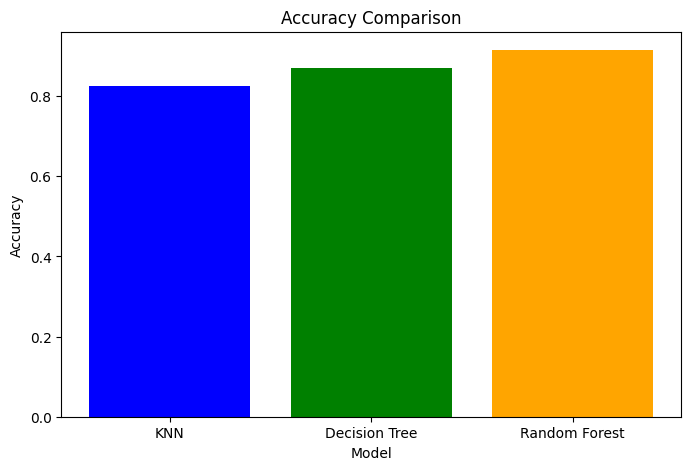

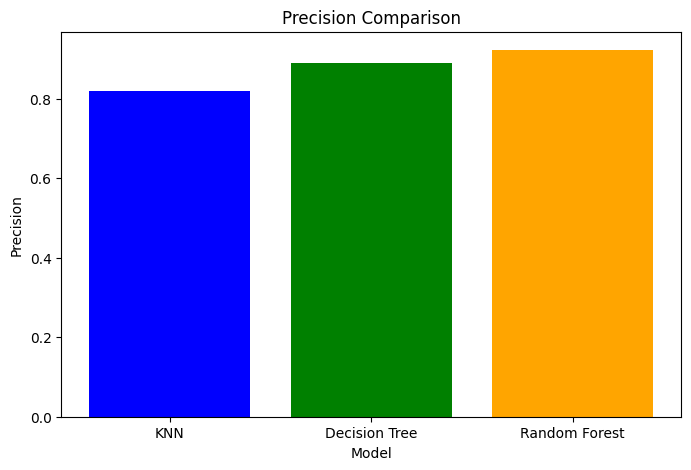

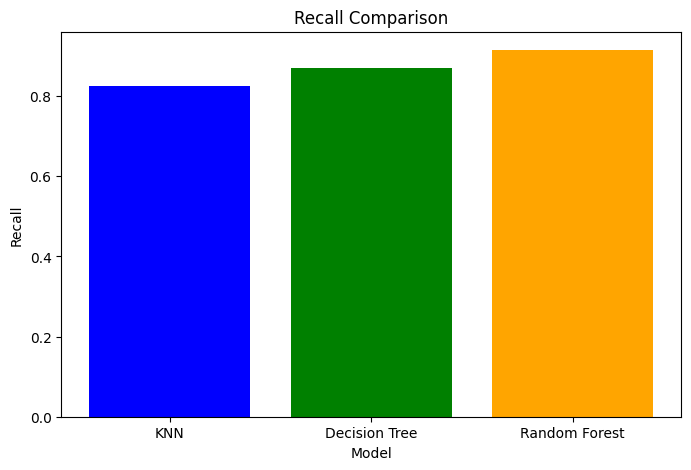

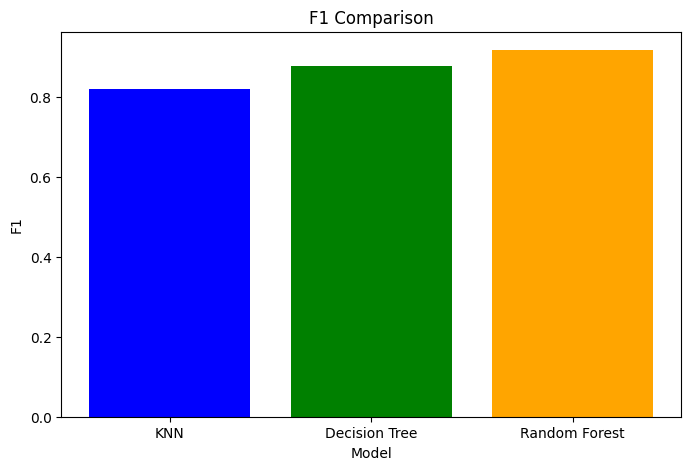

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_metrics_bar_chart(model_names, metric_function, metric_name):
    values = [metric_function(test_data['Fertility'], predictions) for predictions in [knn_predictions, dt_predictions, rf_predictions]]
    plt.figure(figsize=(8, 5))
    plt.bar(model_names, values, color=['blue', 'green', 'orange'])
    plt.title(f"{metric_name} Comparison")
    plt.xlabel("Model")
    plt.ylabel(metric_name)
    plt.show()

# Plot bar charts for custom metrics
model_names = ['KNN', 'Decision Tree', 'Random Forest']
plot_metrics_bar_chart(model_names, accuracy_score, 'Accuracy')
plot_metrics_bar_chart(model_names, precision_score, 'Precision')
plot_metrics_bar_chart(model_names, recall_score, 'Recall')
plot_metrics_bar_chart(model_names, f1_score, 'F1')

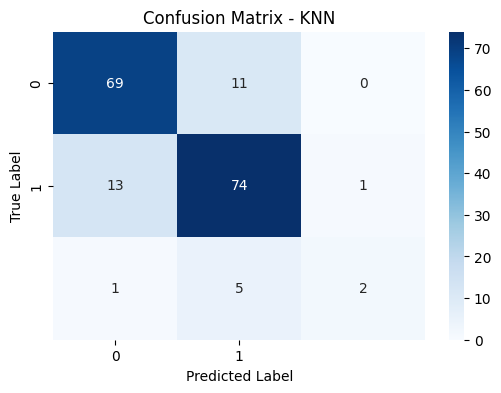

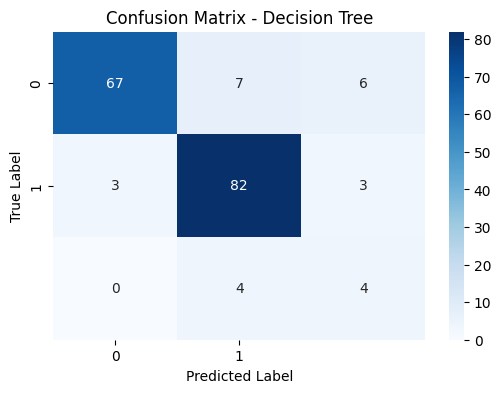

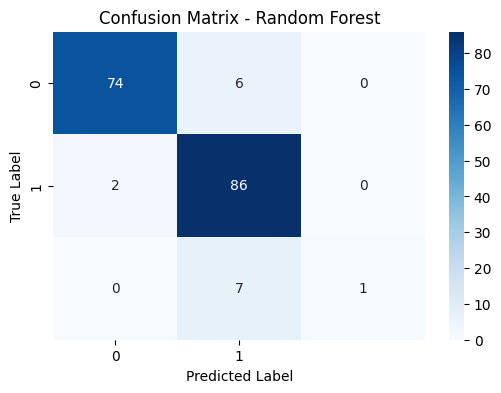

In [ ]:
def plot_confusion_matrix(true_labels, predicted_labels, model_name):
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

plot_confusion_matrix(test_data['Fertility'], knn_predictions, "KNN")
plot_confusion_matrix(test_data['Fertility'], dt_predictions, "Decision Tree")
plot_confusion_matrix(test_data['Fertility'], rf_predictions, "Random Forest")

IndexError: ignored

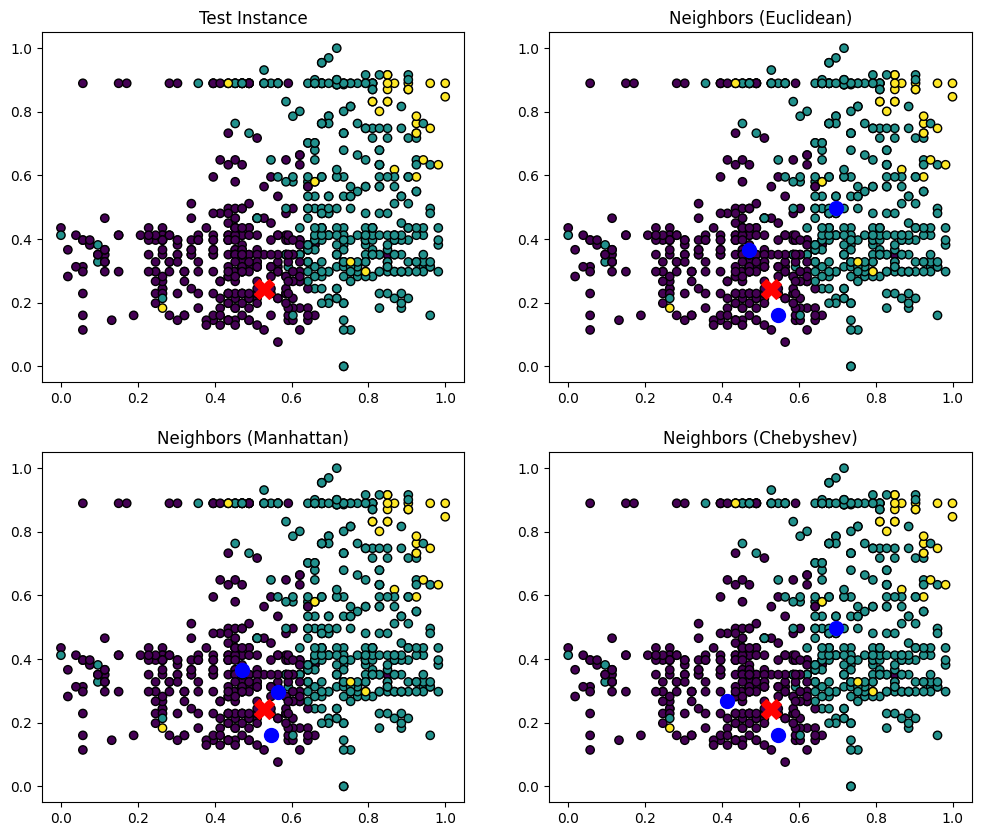

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

random_instance = test_data.sample(n=1, random_state=42)
X_test_instance = random_instance.drop('Fertility', axis=1)

# Distance metrics
distance_metrics = ['euclidean', 'manhattan', 'chebyshev', 'cosine']

# Set up the plot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot the test instance
axes[0, 0].scatter(train_data.iloc[:, 0], train_data.iloc[:, 1], c=train_data['Fertility'], cmap='viridis', edgecolors='k')
axes[0, 0].scatter(X_test_instance.iloc[:, 0], X_test_instance.iloc[:, 1], color='red', marker='X', s=200, label='Test Instance')
axes[0, 0].set_title('Test Instance')

# Plot neighbors for each distance metric
for i, metric in enumerate(distance_metrics):
    knn_classifier.distance_metric = metric
    predicted_label = knn_classifier.predict(X_test_instance)

    # Get neighbors indices
    distances = knn_classifier.calculate_distances(X_test_instance.values.flatten())
    nearest_neighbors_indices = np.argsort(distances)[:knn_classifier.k]

    # Plot neighbors
    axes[(i+1)//2, (i+1)%2].scatter(train_data.iloc[:, 0], train_data.iloc[:, 1], c=train_data['Fertility'], cmap='viridis', edgecolors='k')
    axes[(i+1)//2, (i+1)%2].scatter(X_test_instance.iloc[:, 0], X_test_instance.iloc[:, 1], color='red', marker='X', s=200, label='Test Instance')
    axes[(i+1)//2, (i+1)%2].scatter(train_data.iloc[nearest_neighbors_indices, 0], train_data.iloc[nearest_neighbors_indices, 1],
                                     c='blue', marker='o', s=100, label=f'Neighbors ({metric.capitalize()})')
    axes[(i+1)//2, (i+1)%2].set_title(f'Neighbors ({metric.capitalize()})')

plt.tight_layout()
plt.show()